<a href="https://colab.research.google.com/github/vvs1v/Time_Series_project/blob/main/TS_forcasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Time Series Data

In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

stock_data = yf.download("AAPL",start='2024-01-01')
stock_data.head(10)

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2024-01-02,184.290451,187.070099,182.553173,185.789468,82488700
2024-01-03,182.910538,184.528693,182.096492,182.880757,58414500
2024-01-04,180.587524,181.758939,179.565014,180.825770,71983600
2024-01-05,179.862854,181.431370,178.860202,180.666978,62379700
2024-01-08,184.211014,184.250731,180.180532,180.766239,59144500
2024-01-09,183.794067,183.803989,181.401584,182.582935,42841800
2024-01-10,184.836426,185.044891,182.582924,183.009806,46792900
2024-01-11,184.240768,185.690161,182.285089,185.183859,49128400


Classical Time Series Decomposition

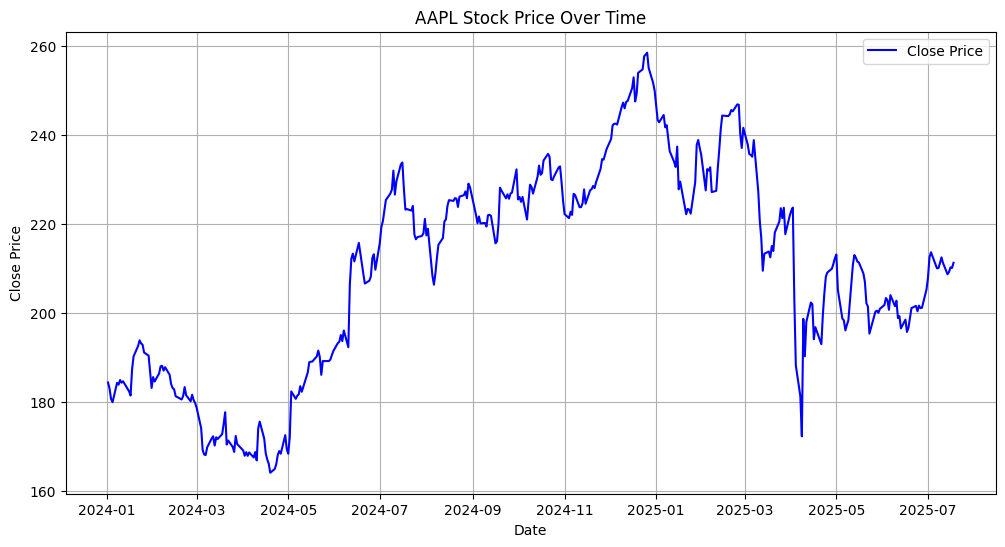

In [2]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition_additive = seasonal_decompose(stock_data['Close'],model = 'additive',period=30)
# decomposition_additive.plot()
# plt.show()
plt.figure(figsize=(12,6))
# plt.plot(stock_data.index,stock_data['Close'],label='Close Price',color='blue')
plt.plot(stock_data['Close'],label='Close Price',color='blue')
plt.xlabel('Date')
plt.title('AAPL Stock Price Over Time')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

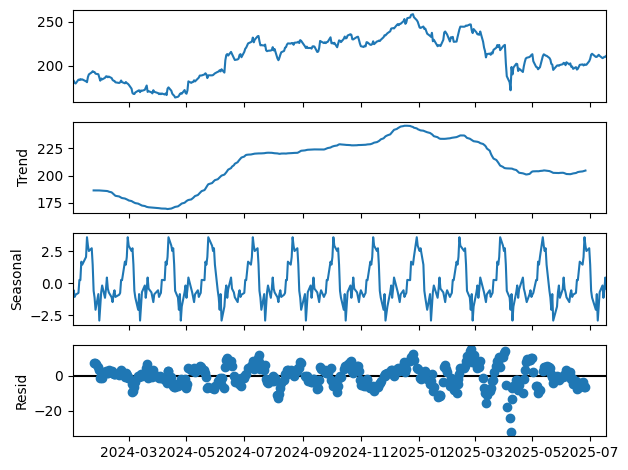

In [3]:
decomposition_additive1 = seasonal_decompose(stock_data['Close'],model = 'additive',period=30)
decomposition_additive1.plot()
plt.show()

In [4]:
trend_additive = decomposition_additive.trend
seasonal_additive = decomposition_additive.seasonal
residual_additive = decomposition_additive.resid

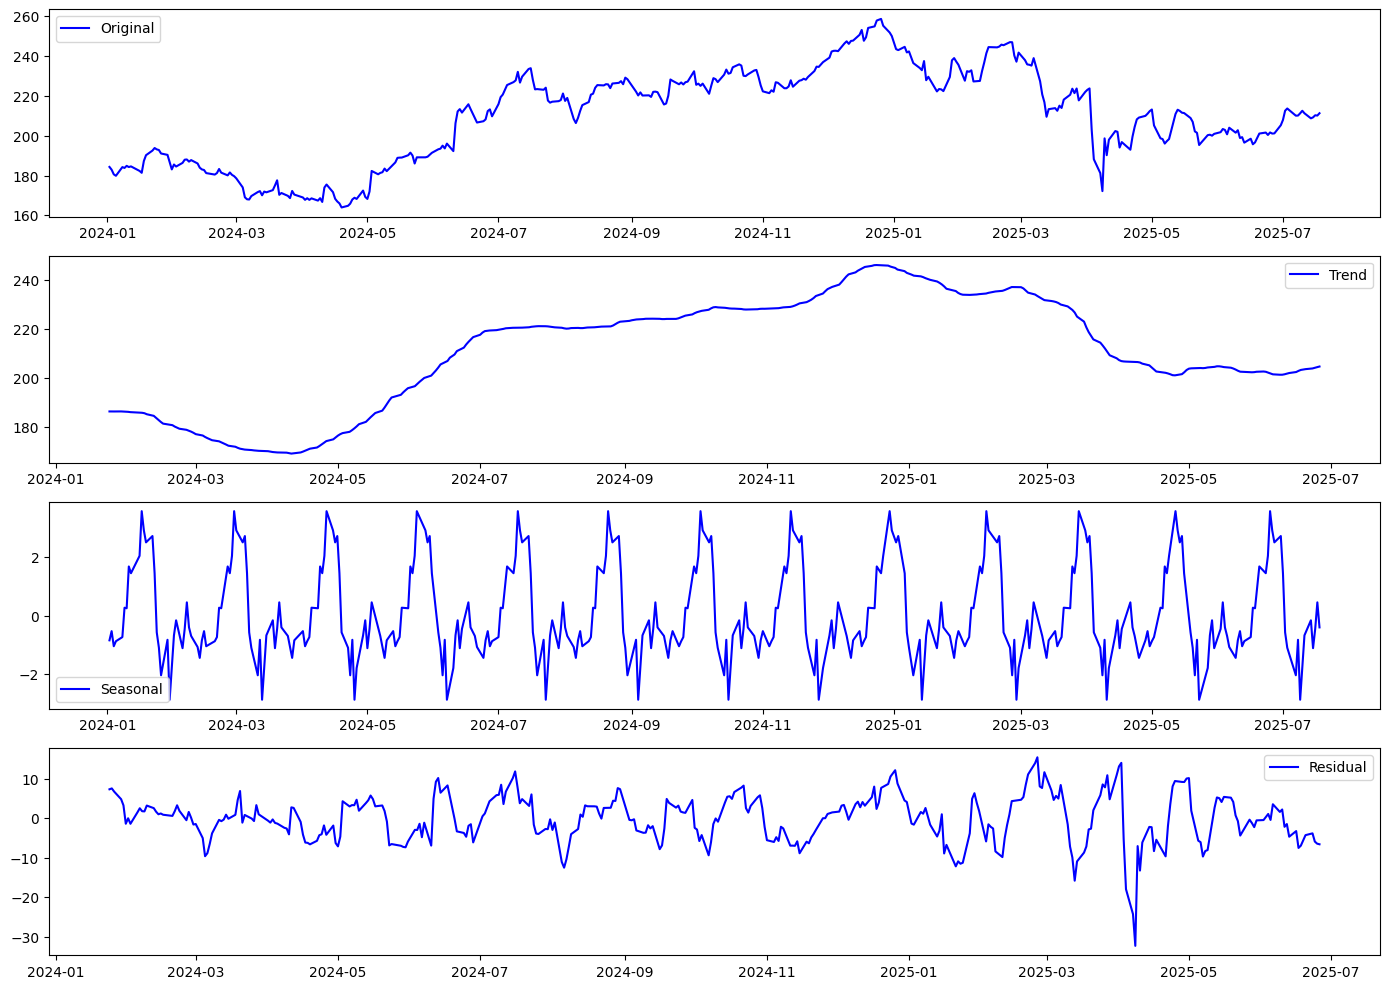

In [5]:
plt.figure(figsize=(14,10))
plt.subplot(411)
plt.plot(stock_data['Close'],label='Original',color='blue')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend_additive,label='Trend',color='blue')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal_additive,label='Seasonal',color='blue')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual_additive,label='Residual',color='blue')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

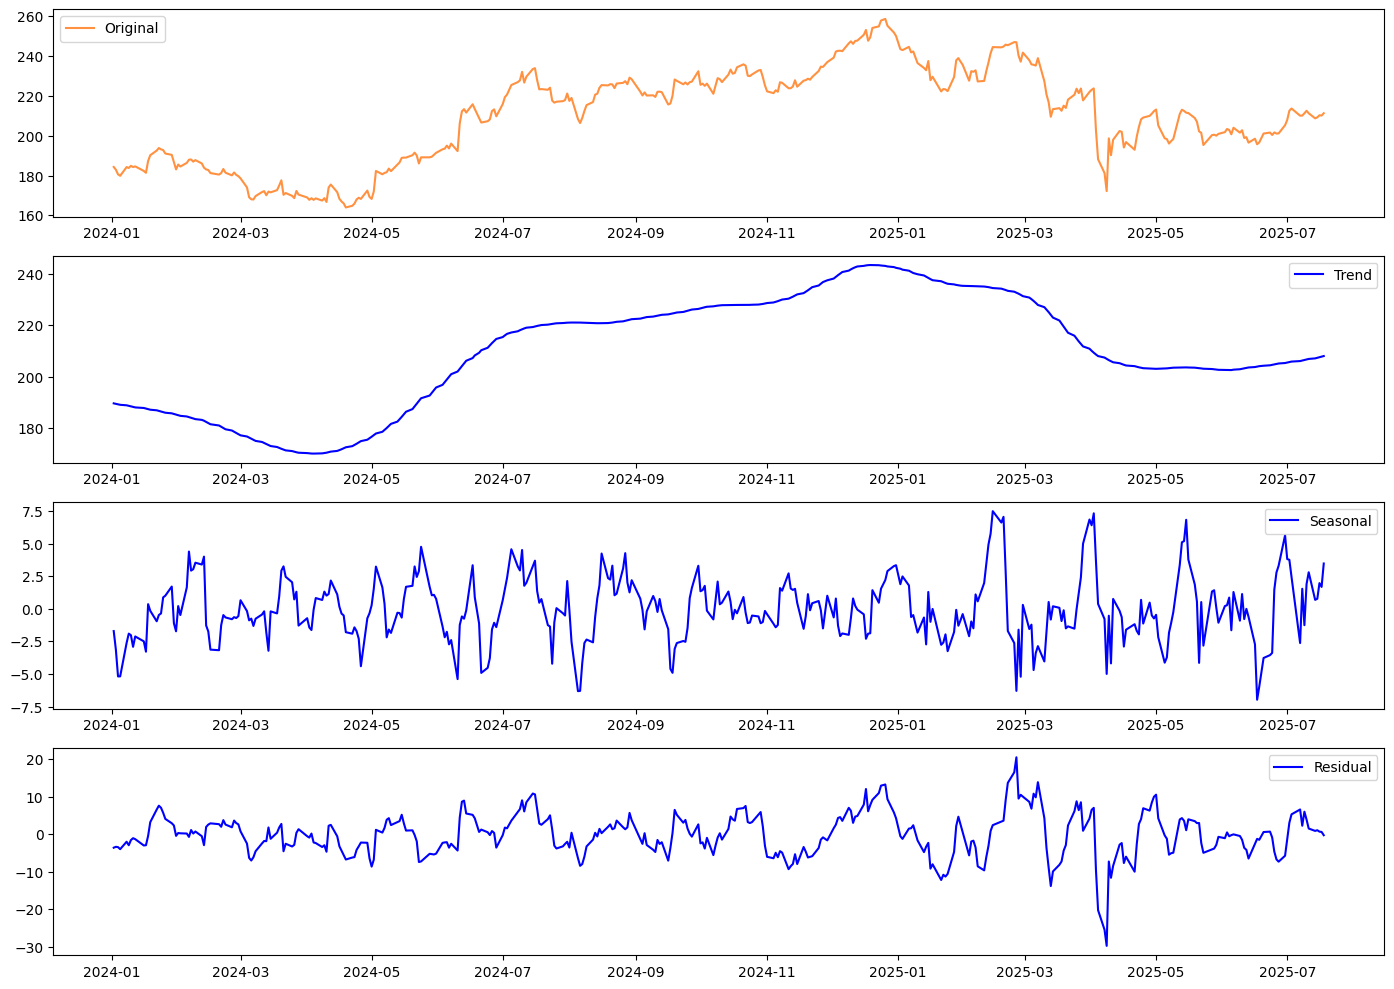

In [6]:
from statsmodels.tsa.seasonal import STL
decomposition_TSL = STL(stock_data['Close'],period=30)
result = decomposition_TSL.fit()

plt.figure(figsize=(14,10))

plt.subplot(411)
plt.plot(result.observed,label='Original',color='#FF9140')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(result.trend,label='Trend',color='blue')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(result.seasonal,label='Seasonal',color='blue')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(result.resid,label='Residual',color='blue')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


In [7]:
from statsmodels.tsa.stattools import adfuller

#Test for Augmented Dickey Fuller
adf = adfuller(stock_data['Close'])
print("ADF Statistics",round(adf[0],3))
print("P-Value",round(adf[1],3))
for key,value in adf[4].items():
  print(key,value)

if adf[1] < 0.05:
  print("Reject Null Hypothesis meaning ts is stationary")
else:
  print("Fail to Reject Null Hypothesis meaning ts has unit root non stationary")

if adf[0] < adf[4]['5%']:
  print("Reject Null Hypothesis meaning ts is stationary")
else:
  print("Fail to Reject Null Hypothesis meaning ts has unit root non stationary")

ADF Statistics -1.883
P-Value 0.34
1% -3.44753973676872
5% -2.8691160516676844
10% -2.57080585953957
Fail to Reject Null Hypothesis meaning ts has unit root non stationary
Fail to Reject Null Hypothesis meaning ts has unit root non stationary


In [8]:
from statsmodels.tsa.stattools import kpss

#Test for Kwiatkowski-Phillips-Schmidt-Shin
kpss_test = kpss(stock_data['Close'],regression="ct") # c for constant (level stationary), ct for trend
print("KPSS Statistics",round(kpss_test[0],3))
print("P-Value",round(kpss_test[1],3))
for key,value in kpss_test[3].items():
  print(key,value)

KPSS Statistics 0.619
P-Value 0.01
10% 0.119
5% 0.146
2.5% 0.176
1% 0.216


/tmp/ipython-input-8-1747058454.py:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_test = kpss(stock_data['Close'],regression="ct") # c for constant (level stationary), ct for trend


In [9]:
if kpss_test[1] < 0.05:
  print("null hypothesis rejected meaning ts is non stationary has unit root")
else:
  print("null hypothesis not rejected meaning ts is stationary")

if kpss_test[0] > kpss_test[3]['5%']:
  print("null hypothesis rejected meaning ts is non stationary has unit root")
else:
  print("null hypothesis not rejected meaning ts is stationary")
#

null hypothesis rejected meaning ts is non stationary has unit root
null hypothesis rejected meaning ts is non stationary has unit root


In [12]:
  import numpy as np
  from scipy.stats import ks_2samp
  import matplotlib.pyplot as plt
  np.random.seed(0)
  n = 500

  strict_stationary = np.random.normal(0,1,n)

  weak_stationary = np.concatenate((np.random.normal(0,1,n//2),np.random.normal(0,2,n//2)))

  def ks_2samp1(series):
    series1 = series[:n//2]
    series2 = series[n//2:]
    stat,p_value = ks_2samp(series1,series2)
    return stat,p_value

  ks_stat_strict,ks_p_value_strict = ks_2samp1(strict_stationary)
  ks_stat_weak,ks_p_value_weak = ks_2samp1(weak_stationary)

  print("Strict Stationary",ks_stat_strict,"strict_stationary p value",ks_p_value_strict)
  print("Weak Stationary",ks_stat_weak,"Weak_stationary p value",ks_p_value_weak)



Strict Stationary 0.076 strict_stationary p value 0.4665404259526072
Weak Stationary 0.224 Weak_stationary p value 6.575145345880697e-06


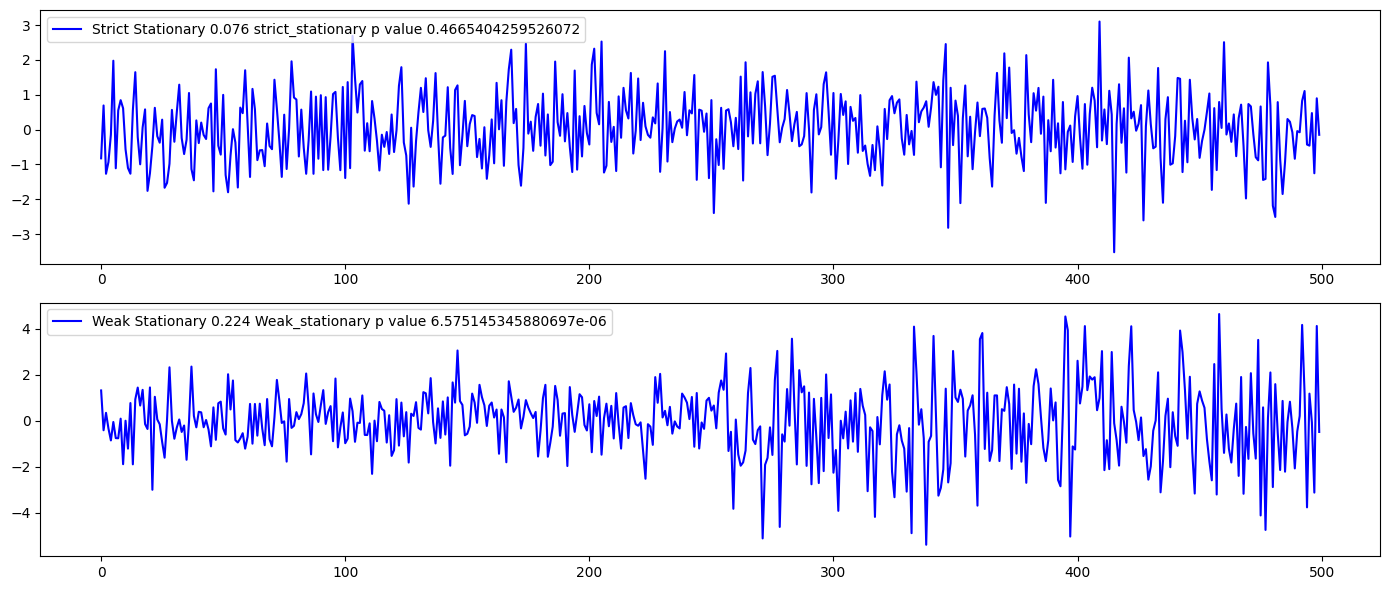

In [15]:
plt.figure(figsize=(14,6))
plt.subplot(211)
plt.plot(strict_stationary,label='Strict Stationary 0.076 strict_stationary p value 0.4665404259526072',color='blue')
plt.legend(loc='upper left')
plt.subplot(212)
plt.plot(weak_stationary,label='Weak Stationary 0.224 Weak_stationary p value 6.575145345880697e-06',color='blue')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

Making TS data Stationary

In [17]:
def adf_test(prices):
  adf = adfuller(prices)
  print("ADF Statistics",round(adf[0],3))
  print("P-Value",round(adf[1],3))
  for key,value in adf[4].items():
    print(key,value)

  if adf[1] < 0.05:
    print("Reject Null Hypothesis meaning ts is stationary")
  else:
    print("Fail to Reject Null Hypothesis meaning ts has unit root non stationary")

  if adf[0] < adf[4]['5%']:
    print("Reject Null Hypothesis meaning ts is stationary")
  else:
    print("Fail to Reject Null Hypothesis meaning ts has unit root non stationary")


In [18]:
# Differencing
prices = stock_data['Close']
prices.diff()
p_diff = prices.diff().dropna()

adf_test(prices.diff().dropna())

ADF Statistics -11.598
P-Value 0.0
1% -3.44753973676872
5% -2.8691160516676844
10% -2.57080585953957
Reject Null Hypothesis meaning ts is stationary
Reject Null Hypothesis meaning ts is stationary


In [37]:
from scipy import stats

#Transformation

#Logratimic

prices_log = np.log(prices)
adf_test(prices_log)

#Power taking squred root

prices_sqrt = np.sqrt(prices)
adf_test(prices_sqrt)

#box-cox it requeires all positive value

prices_boxcox,lambda_ = stats.boxcox(prices.values[prices>0])
adf_test(prices_boxcox)

ADF Statistics -1.871
P-Value 0.346
1% -3.44753973676872
5% -2.8691160516676844
10% -2.57080585953957
Fail to Reject Null Hypothesis meaning ts has unit root non stationary
Fail to Reject Null Hypothesis meaning ts has unit root non stationary
ADF Statistics -1.876
P-Value 0.343
1% -3.44753973676872
5% -2.8691160516676844
10% -2.57080585953957
Fail to Reject Null Hypothesis meaning ts has unit root non stationary
Fail to Reject Null Hypothesis meaning ts has unit root non stationary
ADF Statistics -1.894
P-Value 0.335
1% -3.44753973676872
5% -2.8691160516676844
10% -2.57080585953957
Fail to Reject Null Hypothesis meaning ts has unit root non stationary
Fail to Reject Null Hypothesis meaning ts has unit root non stationary


In [36]:
stock_data[("Close",'AAPL')].values


array([184.29045105, 182.91053772, 180.58752441, 179.862854  ,
       184.21101379, 183.79406738, 184.83642578, 184.24076843,
       184.56837463, 182.29502869, 181.35192871, 187.25866699,
       190.16737366, 192.48043823, 193.76107788, 193.08599854,
       192.75839233, 191.02111816, 190.33613586, 186.67295837,
       183.05941772, 185.50154114, 184.49890137, 186.31558228,
       187.92381287, 188.03300476, 186.95095825, 187.71632385,
       186.02650452, 183.92918396, 183.04450989, 182.75627136,
       181.21557617, 180.470047  , 181.2255249 , 183.26321411,
       181.42431641, 180.07246399, 181.53364563, 180.33091736,
       179.66496277, 178.58148193, 174.04885864, 169.09873962,
       168.10473633, 167.98547363, 169.70507812, 171.71295166,
       172.19007874, 170.10270691, 171.96144104, 171.58374023,
       172.67715454, 175.02294922, 177.59742737, 170.3412323 ,
       171.24578857, 169.82437134, 168.69120789, 172.26960754,
       170.45056152, 169.0092926 , 167.82643127, 168.63

In [39]:
# Select the 'Close' column for 'AAPL' and apply the condition
close_prices_greater_than_0 = stock_data[('Close', 'AAPL')] > 0

# You can then use this boolean Series to filter the DataFrame
filtered_stock_data = stock_data[close_prices_greater_than_0][('Close','AAPL')]

# Display the first few rows of the filtered DataFrame
display(filtered_stock_data.head())

,Close
,AAPL
Date,
2024-01-02,184.290451
2024-01-03,182.910538
2024-01-04,180.587524
2024-01-05,179.862854
2024-01-08,184.211014


In [41]:
single_index_stock_data = stock_data.droplevel(level='Ticker', axis=1)
display(single_index_stock_data.head())

Price,Close,High,Low,Open,Volume
Date,,,,,
2024-01-02,184.290451,187.070099,182.553173,185.789468,82488700
2024-01-03,182.910538,184.528693,182.096492,182.880757,58414500
2024-01-04,180.587524,181.758939,179.565014,180.825770,71983600
2024-01-05,179.862854,181.431370,178.860202,180.666978,62379700
2024-01-08,184.211014,184.250731,180.180532,180.766239,59144500


In [ ]:
from scipy import stats

# Apply Box-Cox transformation to the 'Close' column where values are greater than 0
close_prices = single_index_stock_data['Close']
prices_boxcox, lambda_ = stats.boxcox(close_prices[close_prices > 0])

# You can now work with the transformed data
# For example, display the first few transformed values
print("Box-Cox transformed 'Close' prices (first 10):")
print(prices_boxcox[:10])
print(f"Lambda value: {lambda_}")

Detrending Removing trend compoinent linear and moving average


In [59]:
from scipy import signal

trend = signal.detrend(prices_boxcox)
adf_test(trend)
# print("prices",prices['AAPL'])

trend2 = np.polyfit(np.arange(len(prices)),prices['AAPL'],1)
# trend2 = np.polyfit(np.arange(len(prices)),prices,1)
# print(trend2)
trendline = np.polyval(trend2,np.arange(len(prices)))
# print(trendline)
# print(prices)
price_detrended = prices['AAPL'].values-trendline
# price_detrended = prices.values-trendline
# print(price_detrended)
adf_test(price_detrended)

ADF Statistics -1.814
P-Value 0.373
1% -3.44753973676872
5% -2.8691160516676844
10% -2.57080585953957
Fail to Reject Null Hypothesis meaning ts has unit root non stationary
Fail to Reject Null Hypothesis meaning ts has unit root non stationary
ADF Statistics -1.81
P-Value 0.375
1% -3.44753973676872
5% -2.8691160516676844
10% -2.57080585953957
Fail to Reject Null Hypothesis meaning ts has unit root non stationary
Fail to Reject Null Hypothesis meaning ts has unit root non stationary


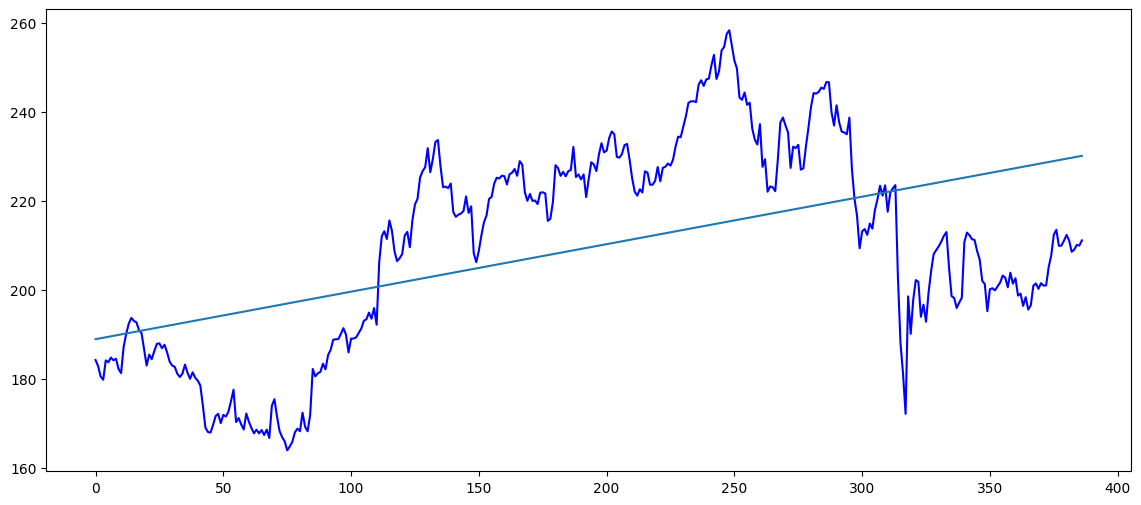

In [85]:
plt.figure(figsize=(14,6))
# plt.subplot(211)
plt.plot(np.arange(len(prices)),prices['AAPL'],label='Original',color='blue')
plt.plot(trendline)
# plt.legend(loc='upper left')
plt.show()

In [62]:
# moving average detrending
window = 12
prices_ma = prices.rolling(window).mean()
prices_dtrended_wa = prices['AAPL'] - prices_ma['AAPL']
adf_test(prices_dtrended_wa.dropna())

ADF Statistics -6.76
P-Value 0.0
1% -3.448003816652923
5% -2.86931999731073
10% -2.5709145866785503
Reject Null Hypothesis meaning ts is stationary
Reject Null Hypothesis meaning ts is stationary


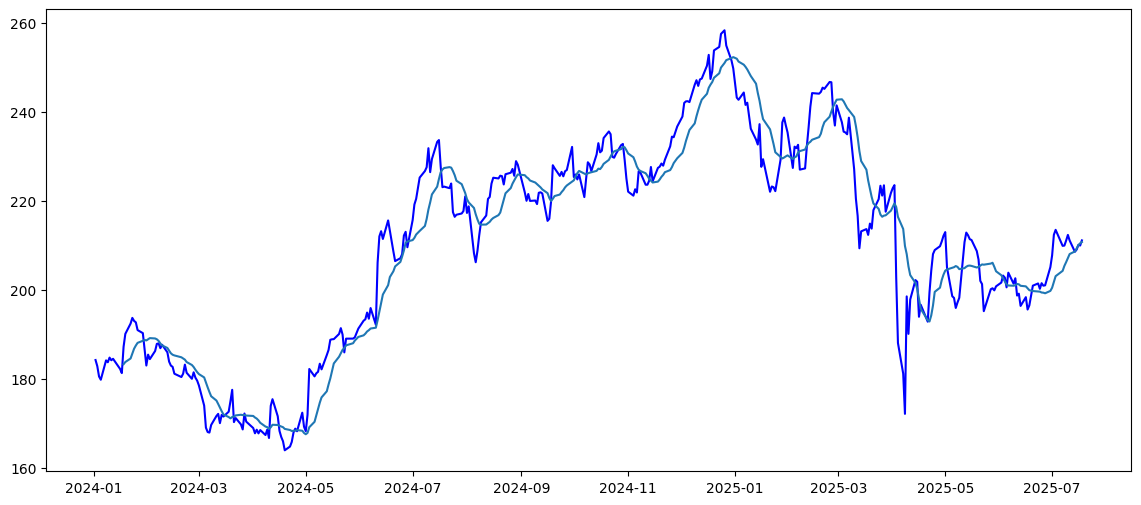

In [82]:
plt.figure(figsize=(14,6))
# plt.subplot(211)
plt.plot(prices['AAPL'],label='Original',color='blue')
plt.plot(prices_ma)
# plt.legend(loc='upper left')
plt.show()


In [81]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition_additive = seasonal_decompose(prices, model = 'additive',period=30)
# print(decomposition_additive.seasonal.values)
# print(prices['AAPL'].values)
pirces_dtrended = prices['AAPL'].values / decomposition_additive.seasonal.values
# print(pirces_dtrended)
adf_test(pirces_dtrended)
# decomposition_additive.plot()
# plt.show()

ADF Statistics -15.536
P-Value 0.0
1% -3.448147967010838
5% -2.8693833397824413
10% -2.5709483564645725
Reject Null Hypothesis meaning ts is stationary
Reject Null Hypothesis meaning ts is stationary


White Noise and Random walk

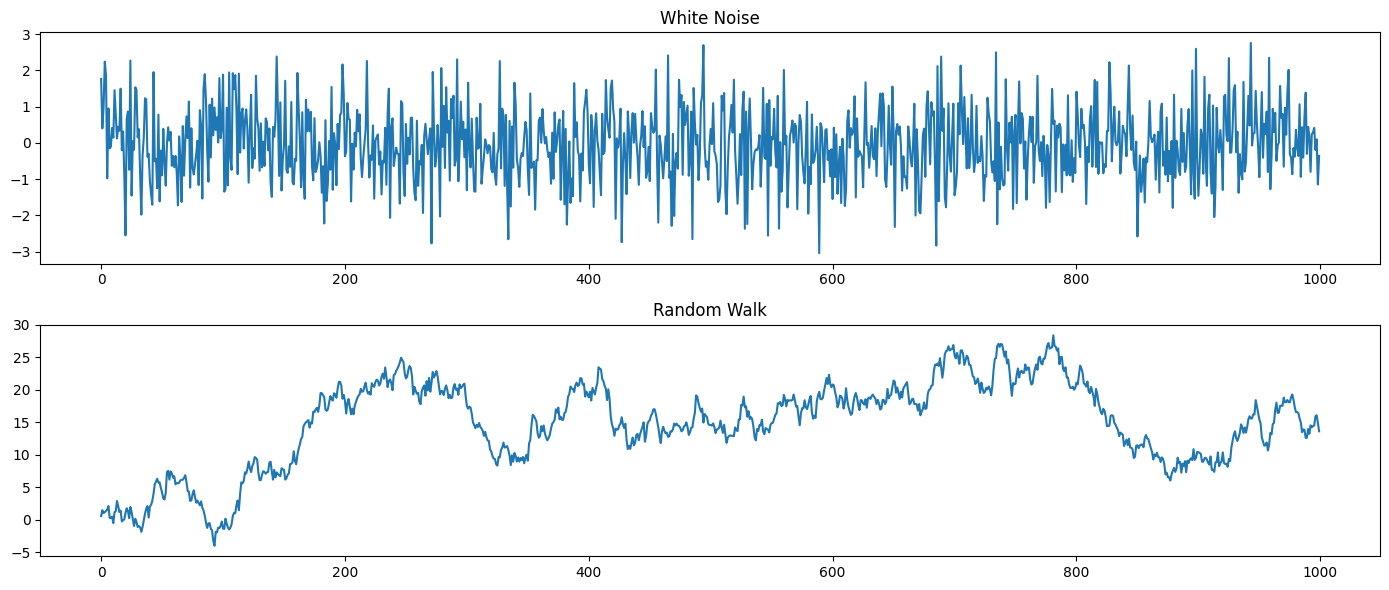

In [86]:
import numpy as np
from statsmodels.stats.diagnostic import acorr_ljungbox

np.random.seed(0)
n = 1000

white_noise = np.random.normal(0,1,n)

random_walk_gen = np.random.normal(0,1,n)
random_walk = np.cumsum(random_walk_gen)

plt.figure(figsize=(14,6))
plt.subplot(211)
plt.title("White Noise")
plt.plot(white_noise)
plt.subplot(212)
plt.title("Random Walk")
plt.plot(random_walk)
plt.tight_layout()
plt.show()


In [88]:
# Test for white noise

white_noise_ljungbox = acorr_ljungbox(white_noise,lags=[10],return_df=True)
print(white_noise_ljungbox)

random_walk_ljungbox = acorr_ljungbox(random_walk,lags=[10],return_df=True)
print(random_walk_ljungbox)

      lb_stat  lb_pvalue
10  14.025574   0.171828
        lb_stat  lb_pvalue
10  8828.660312        0.0


In [1]:
# the null hypothesis is that ts is white noise of if p<.05 we reject it meaning the ts is random_walk else ts is white noise

TS Models AR MA ARMA ARIMA SARIMA VAR VMA VARMA VARIMA

In [9]:
import yfinance as yf

stock_data = yf.download("AAPL",start='2023-01-01')
# stock_data.head(10)
stock_data_close = stock_data[('Close','AAPL')].diff().dropna()
print(stock_data_close.head())
train_data , test_data = stock_data_close[:-30],stock_data_close[-30:]
print("train and test data length",len(train_data),len(test_data))
print(type(train_data[0]))

[*********************100%***********************]  1 of 1 completed

Date
2023-01-04    1.273521
2023-01-05   -1.322884
2023-01-06    4.541199
2023-01-09    0.523216
2023-01-10    0.572586
Name: (Close, AAPL), dtype: float64
train and test data length 607 30
<class 'numpy.float64'>


In [10]:
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Fit Auto Regressive model on training data

model = AutoReg(train_data.values,lags=30)
model_fit = model.fit()
# print(model_fit.summary())

predictions = model_fit.predict(
                      start=len(train_data),
                      end=len(train_data)+len(test_data)-1,
                      dynamic=False)
# print(predictions)


                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                  607
Model:                    AutoReg(30)   Log Likelihood               -1485.161
Method:               Conditional MLE   S.D. of innovations              3.174
Date:                Tue, 22 Jul 2025   AIC                           3034.323
Time:                        08:00:02   BIC                           3173.774
Sample:                            30   HQIC                          3088.703
                                  607                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1153      0.135      0.853      0.394      -0.150       0.380
y.L1           0.0499      0.042      1.202      0.230      -0.032       0.131
y.L2           0.0771      0.041      1.859      0.0

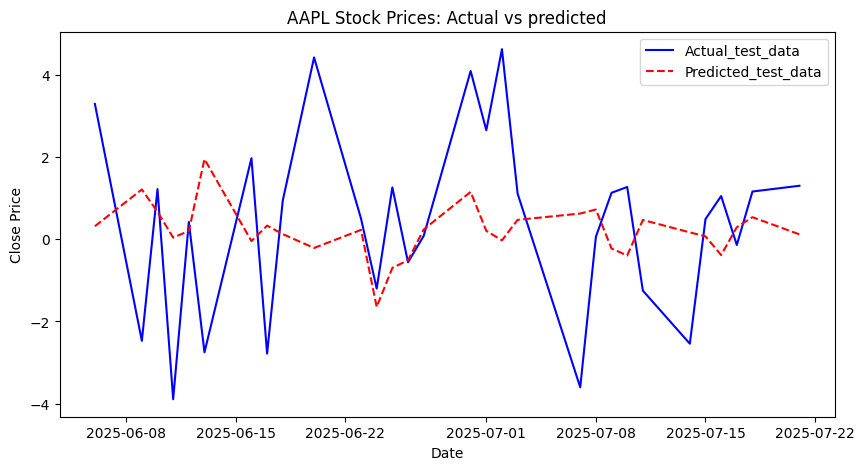

In [15]:
# print predicted values and actual values

plt.figure(figsize=(10,5))
# plt.plot(np.arange(len(test_data)),test_data.values,label='Actual_test_data',color='blue')
# plt.plot(np.arange(len(test_data)),predictions,label='Predicted_test_data',linestyle='--' ,  color='red')
plt.plot(test_data.index,test_data.values,label='Actual_test_data',color='blue')
plt.plot(test_data.index,predictions,label='Predicted_test_data',linestyle='--' ,  color='red')
plt.title("AAPL Stock Prices: Actual vs predicted")
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [14]:
#Evaluating model using RMSE score
rmse = np.sqrt(mean_squared_error(test_data.values,predictions))
print("RMSE",rmse)

RMSE 2.4099836287631597


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  607
Model:                ARIMA(0, 0, 30)   Log Likelihood               -1552.863
Date:                Tue, 22 Jul 2025   AIC                           3169.726
Time:                        08:13:17   BIC                           3310.799
Sample:                             0   HQIC                          3224.615
                                - 607                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1256      0.126      1.000      0.317      -0.120       0.372
ma.L1          0.0426      0.034      1.264      0.206      -0.023       0.109
ma.L2          0.0979      0.042      2.342      0.0

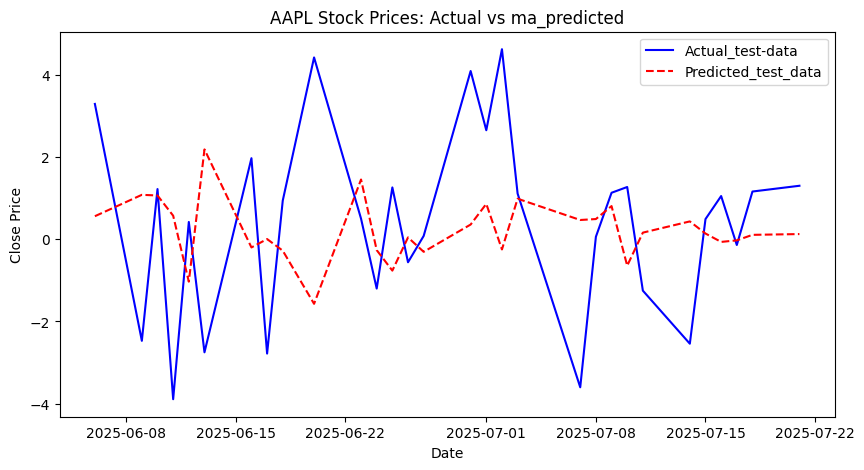

RMSE 2.573675721505787


In [16]:
#Fitting ma model using arima by taking order (0,0,30) meaning q=30

model = ARIMA(train_data.values,order=(0,0,30))
model_fit = model.fit()
print(model_fit.summary())

ma_prediction = model_fit.predict(start=len(train_data),end=len(train_data)+len(test_data)-1,dynamic=False)
print(ma_prediction)

#plotting actual vs predited
plt.figure(figsize=(10,5))
plt.plot(test_data.index,test_data.values,label='Actual_test-data',color='blue')
plt.plot(test_data.index,ma_prediction,label='Predicted_test_data',linestyle='--' ,  color='red')
plt.title("AAPL Stock Prices: Actual vs ma_predicted")
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

#taking rmse error
rmse = np.sqrt(mean_squared_error(test_data.values,ma_prediction))
print("RMSE",rmse)

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  607
Model:                ARIMA(7, 0, 10)   Log Likelihood               -1564.575
Date:                Tue, 22 Jul 2025   AIC                           3167.151
Time:                        08:25:17   BIC                           3250.913
Sample:                             0   HQIC                          3199.741
                                - 607                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1309      0.128      1.019      0.308      -0.121       0.383
ar.L1         -0.2969      4.225     -0.070      0.944      -8.578       7.984
ar.L2          0.4375      3.833      0.114      0.9

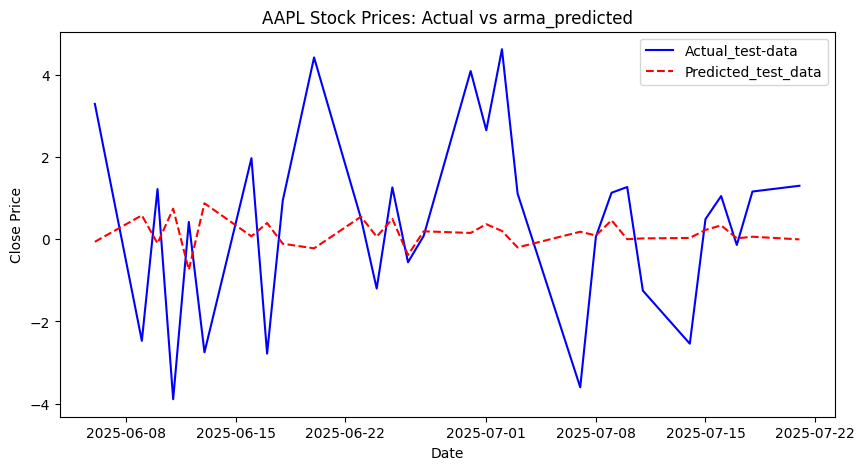

RMSE 2.358375587002763


In [19]:
 # for ARMA model (7,0,7) as d = 0 p = 7 and q = 7

 #Fitting ma model using arima by taking order (0,0,30) meaning q=30

model = ARIMA(train_data.values,order=(7,0,10))
model_fit = model.fit()
print(model_fit.summary())

arma_prediction = model_fit.predict(start=len(train_data),end=len(train_data)+len(test_data)-1,dynamic=False)
print(arma_prediction)

#plotting actual vs predited
plt.figure(figsize=(10,5))
plt.plot(test_data.index,test_data.values,label='Actual_test-data',color='blue')
plt.plot(test_data.index,arma_prediction,label='Predicted_test_data',linestyle='--' ,  color='red')
plt.title("AAPL Stock Prices: Actual vs arma_predicted")
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

#taking rmse error
rmse = np.sqrt(mean_squared_error(test_data.values,arma_prediction))
print("RMSE",rmse)

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  607
Model:                ARIMA(7, 1, 10)   Log Likelihood               -1566.338
Date:                Tue, 22 Jul 2025   AIC                           3168.675
Time:                        08:27:25   BIC                           3247.999
Sample:                             0   HQIC                          3199.541
                                - 607                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0859      0.315     -3.442      0.001      -1.704      -0.468
ar.L2         -0.6459      0.381     -1.695      0.090      -1.393       0.101
ar.L3         -0.6930      0.338     -2.048      0.0

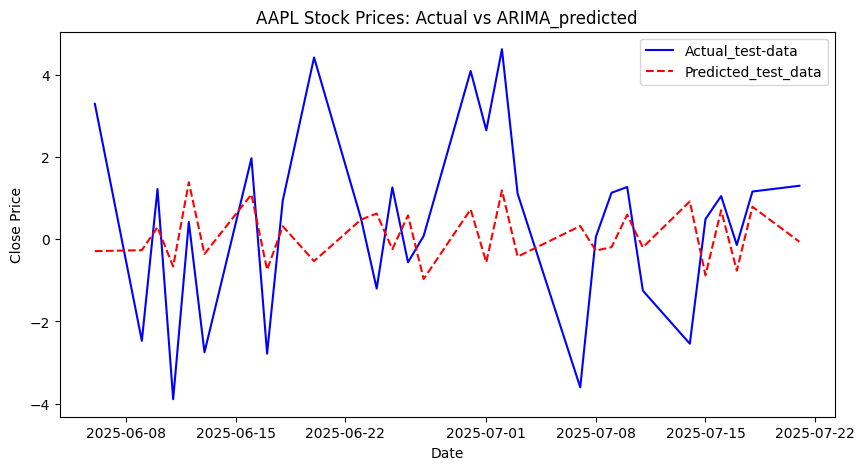

RMSE 2.1931256697951156


In [20]:
#Arima model so using(7,1,10) p = 7,d=1,q=10
#Fitting ma model using arima by taking order (0,0,30) meaning q=30

model = ARIMA(train_data.values,order=(7,1,10))
model_fit = model.fit()
print(model_fit.summary())

arima_prediction = model_fit.predict(start=len(train_data),end=len(train_data)+len(test_data)-1,dynamic=False)
print(arima_prediction)

#plotting actual vs predited
plt.figure(figsize=(10,5))
plt.plot(test_data.index,test_data.values,label='Actual_test-data',color='blue')
plt.plot(test_data.index,arima_prediction,label='Predicted_test_data',linestyle='--' ,  color='red')
plt.title("AAPL Stock Prices: Actual vs ARIMA_predicted")
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

#taking rmse error
rmse = np.sqrt(mean_squared_error(test_data.values,arima_prediction))
print("RMSE",rmse)

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
p,d,q = 7,1,10
P,D,Q,s = 7,1,10,30

model = SARIMAX(train_data.values,order=(p,d,q),seasonal_order=(P,D,Q,s))
model_fit = model.fit()
print(model_fit.summary())